STUDENT NAME : SHARMILA S
TASK2        : MOVIE RATING PREDICTION WITH PYTHON
DOMAIN       : DATA SCIENCE
AIM          : TO ANALYZE HISTORICAL MOVIE DATA AND DEVELOP A MODEL THAT ACCURATELY ESTIMATES THE RATING GIVEN TO A MOVIE BY USER


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Load the Dataset

In [2]:
data = pd.read_csv('C:\\Users\\Dell\\Downloads\\IMDb Movies India.csv', encoding='latin-1')


In [3]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [4]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
data.shape

(15509, 10)

In [6]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
data['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [10]:
rating = data['Rating'].value_counts()
print("Rating distribution\n",rating) 

Rating distribution
 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
attributes = ['Name','Year','Duration','Rating','Votes']
data.dropna(subset= attributes,inplace=True)
missing_value = data.isna().sum()
missing_value

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [13]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [14]:
movie_name_rating = data[['Name','Rating']]
movie_name_rating

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6
...,...,...
15493,Zubaan,6.1
15494,Zubeidaa,6.2
15503,Zulm Ki Zanjeer,5.8
15505,Zulmi,4.5


# Visualization

<AxesSubplot:>

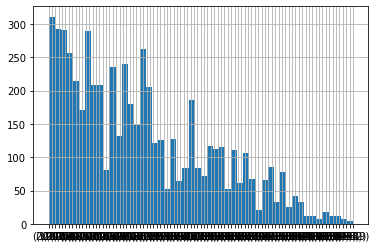

In [15]:
import matplotlib.pyplot as plt
data['Year'].hist(bins=50)


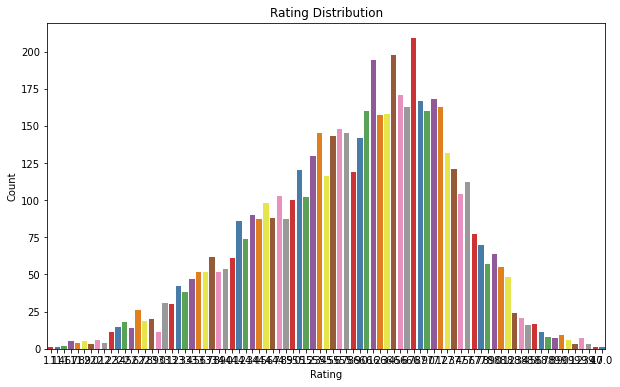

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data, palette='Set1')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


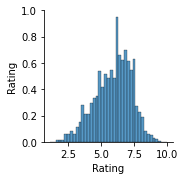

In [19]:
numeric_columns = ['Rating', 'Votes']  # Add more if needed
sns.pairplot(data[numeric_columns])
plt.show()


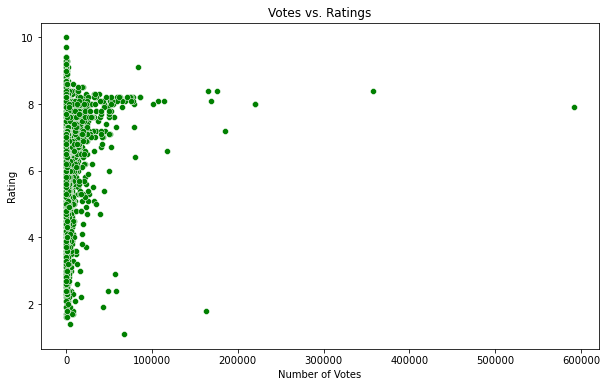

In [20]:
data['Votes'] = data['Votes'].str.replace(',', '').astype(float)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=data, color='green')
plt.title('Votes vs. Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()


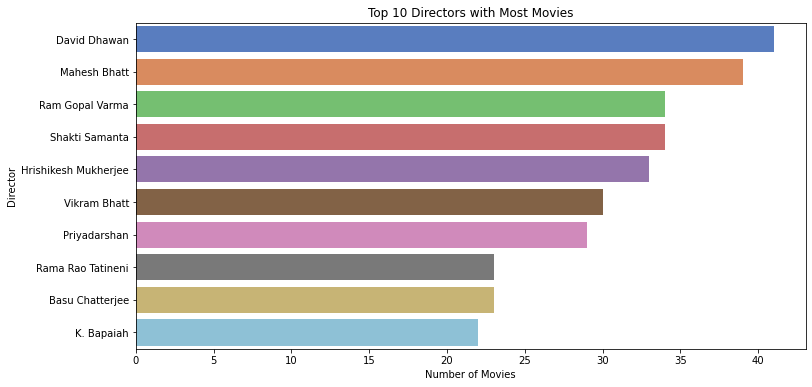

In [21]:
top_directors = data['Director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='muted')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


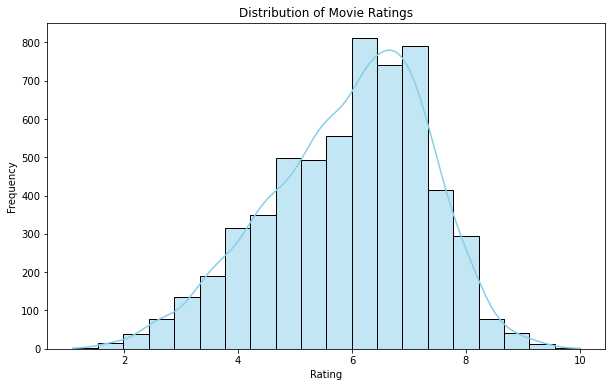

In [22]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


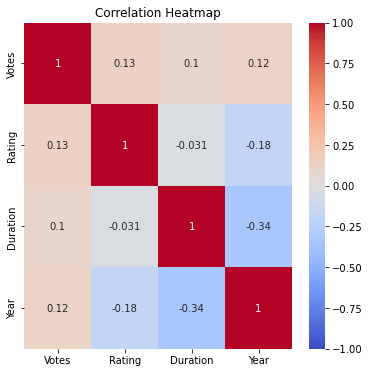

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'dataset' and a list of numerical columns named 'numerical_columns'
numerical_columns = ["Votes", "Rating", "Duration", "Year"]

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Feature engineering

In [23]:
data_sorted = data.sort_values(by="Votes", ascending=False)
data_sorted["Vote_Count_Percentile"] = data_sorted["Votes"].rank(pct=True) * 100
data_sorted.reset_index(drop=True, inplace=True)
print(data_sorted[["Name", "Votes", "Vote_Count_Percentile"]])


                        Name     Votes  Vote_Count_Percentile
0                 Life of Pi  591417.0             100.000000
1                   3 Idiots  357889.0              99.982909
2                       Lion  220526.0              99.965818
3                     Gandhi  220118.0              99.948727
4     The Darjeeling Limited  185127.0              99.931636
...                      ...       ...                    ...
5846          Romeo N Bullet       5.0               0.410186
5847          Kadke Kamal Ke       5.0               0.410186
5848              Naami Chor       5.0               0.410186
5849             Chori Chori       5.0               0.410186
5850              Night Club       5.0               0.410186

[5851 rows x 3 columns]


In [24]:
data = data.dropna(subset = ['Votes'])

# Model training

In [27]:
# Convert 'Year' column to string
data['Year'] = data['Year'].astype(str)

# Convert 'Ouration' column to string
data['Duration'] = data['Duration'].astype(str)

# Extract numeric values from 'Year' and convert to float
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)

# Extract numeric values from 'Duration' and convert to float
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

# Assuming 'X' is your feature matrix
X = data[['Year', 'Duration', 'Votes']]
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model=LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

# Make Predictions

In [39]:
y_pred=model.predict(X_test)
y_pred

array([6.00059679, 6.21103832, 5.82377436, ..., 5.68991019, 5.80865482,
       6.21655116])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you already have 'y_test' and 'y_pred' from the previous code

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error: 1.0668333990630767
Root Mean Squared Error: 1.3396081919647012
R-squared (R2) Score: 0.035455931518243444
